# LOAD package

In [1]:
from astropy.io import fits
import numpy as np
from multiprocessing import Process
from sklearn.neighbors import BallTree
from astropy.cosmology import FlatLambdaCDM
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from astropy.table import Table,Column,hstack,vstack
from astropy.io import ascii
import os

In [2]:
from astropy.cosmology import FlatLambdaCDM,z_at_value
cosmo = FlatLambdaCDM(H0 = 67.74,Om0 = 0.3089,Ob0 = 0.0486)

import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
from astropy.io import fits
from multiprocessing import Pool, Array, Manager

In [3]:
import seaborn as sns
sns.set()

# LOAD SED result

In [4]:
SED_Para = ['IDENT','SCALE_BEST','MOD_BEST','EXTLAW_BEST','EBV_BEST','CHI_BEST','NBAND_USED', \
            'AGE_BEST','AGE_INF','AGE_MED','AGE_SUP','MASS_BEST','MASS_INF','MASS_MED','MASS_SUP',\
            'SFR_BEST','SFR_INF','SFR_MED','SFR_SUP','SSFR_BEST','SSFR_INF','SSFR_MED','SSFR_SUP', \
            'FUV_OBS','NUV_OBS','u_OBS','g_OBS','r_OBS','i_OBS','iy_OBS','z_OBS','Ks_OBS','K_OBS','hsc_g_OBS','hsc_r_OBS','hsc_i_OBS','hsc_z_OBS','hsc_y_OBS',\
            'ERR_FUV_OBS','ERR_NUV_OBS','ERR_u_OBS','ERR_g_OBS','ERR_r_OBS','ERR_i_OBS','ERR_iy_OBS','ERR_z_OBS','ERR_Ks_OBS','ERR_K_OBS','ERR_hsc_g_OBS','ERR_hsc_r_OBS','ERR_hsc_i_OBS','ERR_hsc_z_OBS','ERR_hsc_y_OBS', \
            'FUV_MOD','NUV_MOD','u_MOD','g_MOD','r_MOD','i_MOD','iy_MOD','z_MOD','Ks_MOD','K_MOD','hsc_g_MOD','hsc_r_MOD','hsc_i_MOD','hsc_z_MOD','hsc_y_MOD', \
            'CONTEXT','ZSPEC','RA','DEC','ZFLAG','TSR','SSR','PHOTOMask','CLASSFLAG', 'DeltaUG', 'DeltaGR', 'DeltaRI', \
            'FUV_ABS','NUV_ABS','u_ABS','g_ABS','r_ABS','i_ABS','iy_ABS','z_ABS','Ks_ABS','K_ABS','hsc_g_ABS','hsc_r_ABS','hsc_i_ABS','hsc_z_ABS','hsc_y_ABS','Z_MAX']

W1 = pd.read_table('/home/hygao/research/LePHARE/lephare_dev/zy_VIPERS/zy_VIPERS_w1_T0005.out',sep='\s+',skiprows=59,header=None,names=SED_Para,index_col=False)

In [5]:

SED_Para = ['IDENT','SCALE_BEST','MOD_BEST','EXTLAW_BEST','EBV_BEST','CHI_BEST','NBAND_USED', \
            'AGE_BEST','AGE_INF','AGE_MED','AGE_SUP','MASS_BEST','MASS_INF','MASS_MED','MASS_SUP',\
            'SFR_BEST','SFR_INF','SFR_MED','SFR_SUP','SSFR_BEST','SSFR_INF','SSFR_MED','SSFR_SUP', \
            'FUV_OBS','NUV_OBS','u_OBS','g_OBS','r_OBS','i_OBS','iy_OBS','z_OBS','Ks_OBS','K_OBS','hsc_g_OBS','hsc_r_OBS','hsc_i_OBS','hsc_z_OBS','hsc_y_OBS',\
            'ERR_FUV_OBS','ERR_NUV_OBS','ERR_u_OBS','ERR_g_OBS','ERR_r_OBS','ERR_i_OBS','ERR_iy_OBS','ERR_z_OBS','ERR_Ks_OBS','ERR_K_OBS','ERR_hsc_g_OBS','ERR_hsc_r_OBS','ERR_hsc_i_OBS','ERR_hsc_z_OBS','ERR_hsc_y_OBS', \
            'FUV_MOD','NUV_MOD','u_MOD','g_MOD','r_MOD','i_MOD','iy_MOD','z_MOD','Ks_MOD','K_MOD','hsc_g_MOD','hsc_r_MOD','hsc_i_MOD','hsc_z_MOD','hsc_y_MOD', \
            'CONTEXT','ZSPEC','RA','DEC','ZFLAG','TSR','SSR','PHOTOMask','CLASSFLAG', 'DeltaUG', 'DeltaGR', 'DeltaRI', \
            'FUV_ABS','NUV_ABS','u_ABS','g_ABS','r_ABS','i_ABS','iy_ABS','z_ABS','Ks_ABS','K_ABS','hsc_g_ABS','hsc_r_ABS','hsc_i_ABS','hsc_z_ABS','hsc_y_ABS','Z_MAX']

W4 = pd.read_table('/home/hygao/research/LePHARE/lephare_dev/zy_VIPERS/zy_VIPERS_w4_T0005.out',sep='\s+',skiprows=59,header=None,names=SED_Para,index_col=False)

In [6]:
redshift1 = np.array(W1['ZSPEC'])
zmax1 = np.array(W1['Z_MAX'])
redshift4 = np.array(W4['ZSPEC'])
zmax4 = np.array(W4['Z_MAX'])
zmax = np.hstack([zmax1,zmax4])
redshift = np.hstack([redshift1,redshift4])

In [7]:
w1 = Table.read("/home/yunzheng/PAC/code/VIPERS/SED_new/W1/out/results.fits")
w4 = Table.read("/home/yunzheng/PAC/code/VIPERS/SED_new/W4/out/results.fits")

In [8]:
cigale = vstack((w1,w4))

In [9]:
cigale    #87858

id,bayes.param.restframe_Lnu(DECam.g),bayes.param.restframe_Lnu(DECam.g)_err,bayes.param.restframe_Lnu(DECam.r),bayes.param.restframe_Lnu(DECam.r)_err,bayes.param.restframe_Lnu(sdss.gp),bayes.param.restframe_Lnu(sdss.gp)_err,bayes.param.restframe_Lnu(sdss.rp),bayes.param.restframe_Lnu(sdss.rp)_err,bayes.param.restframe_Lnu(sdss.up),bayes.param.restframe_Lnu(sdss.up)_err,bayes.param.restframe_Lnu(subaru.hsc.g),bayes.param.restframe_Lnu(subaru.hsc.g)_err,bayes.param.restframe_Lnu(subaru.hsc.r),bayes.param.restframe_Lnu(subaru.hsc.r)_err,bayes.stellar.m_star,bayes.stellar.m_star_err,bayes.subaru.hsc.g,bayes.subaru.hsc.g_err,bayes.subaru.hsc.r,bayes.subaru.hsc.r_err,best.chi_square,best.reduced_chi_square,best.attenuation.E_BVs.nebular.continuum_old,best.attenuation.E_BVs.nebular.continuum_young,best.attenuation.E_BVs.nebular.lines_old,best.attenuation.E_BVs.nebular.lines_young,best.attenuation.E_BVs.stellar.old,best.attenuation.E_BVs.stellar.young,best.attenuation.ebvs_old_factor,best.attenuation.powerlaw_slope,best.attenuation.subaru.hsc.g,best.attenuation.uv_bump_amplitude,best.attenuation.uv_bump_wavelength,best.attenuation.uv_bump_width,best.nebular.f_dust,best.nebular.f_esc,best.nebular.lines_width,best.nebular.logU,best.param.restframe_DECam.g-DECam.r,best.param.restframe_sdss.gp-sdss.rp,best.param.restframe_sdss.up-sdss.rp,best.param.restframe_subaru.hsc.g-subaru.hsc.r,best.sfh.age,best.sfh.age_burst,best.sfh.age_main,best.sfh.f_burst,best.sfh.tau_burst,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.metallicity,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.attenuation.nebular.continuum_old,best.attenuation.nebular.continuum_young,best.attenuation.nebular.lines_old,best.attenuation.nebular.lines_young,best.attenuation.stellar.old,best.attenuation.stellar.young,best.dust.luminosity,best.param.restframe_Lnu(DECam.g),best.param.restframe_Lnu(DECam.r),best.param.restframe_Lnu(sdss.gp),best.param.restframe_Lnu(sdss.rp),best.param.restframe_Lnu(sdss.up),best.param.restframe_Lnu(subaru.hsc.g),best.param.restframe_Lnu(subaru.hsc.r),best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.stellar.lum,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.lum_old,best.stellar.lum_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.VIPERS_FUV,best.VIPERS_NUV,best.VIPERS_u,best.VIPERS_g,best.VIPERS_r,best.VIPERS_i,best.VIPERS_z,best.VIPERS_K,best.VIPERS_Ks
,W,W,W,W,W,W,W,W,W,W,W,W,W,W,solMass,solMass,mJy,mJy,mJy,mJy,,,mag,mag,mag,mag,mag,mag,,,mag,,nm,nm,,,km / s,,mag,mag,mag,mag,Myr,Myr,Myr,,Myr,Myr,Myr,,,Myr,Myr,m,,mag,mag,mag,mag,mag,mag,W,W,W,W,W,W,W,W,solMass,solMass / yr,solMass / yr,solMass / yr,W,W,W,W,W,W,solMass,solMass,solMass,solMass,solMass,solMass,ph / s,ph / s,ph / s,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,4.947581183874722e+21,2.4737905919373613e+20,7.68154488556883e+21,3.840772442784415e+20,4.767944880649094e+21,2.3839724403245472e+20,7.392072089621842e+2

In [14]:
u = cigale['bayes.param.restframe_Lnu(sdss.up)']
r = cigale['bayes.param.restframe_Lnu(sdss.rp)']
u_r = -2.5 * np.log10(u/r)
mass = cigale['bayes.stellar.m_star']
mass = np.log10(mass)

# color cut

In [15]:
index = ((redshift<=0.7)&(redshift>=0.5))
mass = mass[index]
u_r = u_r[index]
zmax = zmax[index]

In [16]:
mass.shape

(34358,)

In [19]:
index = (zmax>=0.5)
mass = mass[index]
u_r = u_r[index]
zmax = zmax[index]
zmax[(zmax>0.7)] = 0.7

In [20]:
mass.shape

(34356,)

In [22]:
np.max(u_r)

3.726938239484048

In [24]:
V_0 = []
for i in range(len(zmax)):
    temp = cosmo.comoving_volume(zmax[i]) - cosmo.comoving_volume(0.5)
    V_0.append(temp.value)
    
V_1 = np.array(V_0)

Vtotal = cosmo.comoving_volume(0.7) - cosmo.comoving_volume(0.5)
Vtotal
weight0 = Vtotal.value/V_1

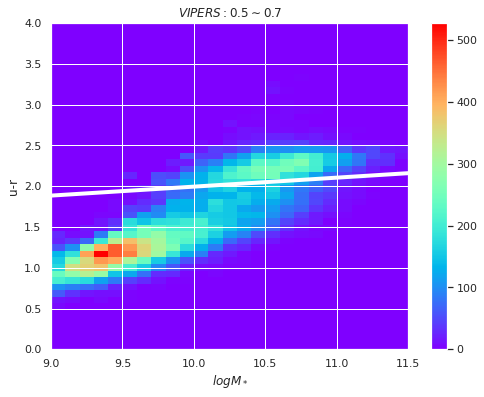

In [27]:
plt.figure(figsize = (8,6))
counts, xbins, ybins = np.histogram2d(mass, u_r,  bins=[30,50],range=[[9,12],[0,4]],weights = weight0)
# print(xbins)
counts = counts.T
counts = counts[::-1]
# weight2 = counts / np.sum(counts,axis = 0)
# weight2[weight2==0]=np.nan
plt.imshow(counts,cmap='rainbow',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],aspect='auto')
plt.colorbar()
# plt.plot([9.0,0.52796795083083],[10,0.5819679508308301],color = "red",linewidth = 2,label="cut")
# plt.plot([9.0,12.0],[0.52796795083083,0.6899679508308301],"white",linewidth = 2,label="cut")
plt.plot([9.0,12.0],[1.885,2.215],"-",color="white",linewidth = 4,label="cut")

plt.xlabel("$log M_*$")
plt.ylabel("u-r")
plt.xlim(9,11.5)
plt.ylim(0,4)
# plt.grid()
plt.title('$VIPERS :0.5 \sim 0.7$')
plt.savefig("./VIPERS_number.pdf",dpi =100)

/tmp/ipykernel_405134/180681089.py:6: RuntimeWarning: invalid value encountered in true_divide
  weight2 = counts / np.sum(counts,axis = 0)


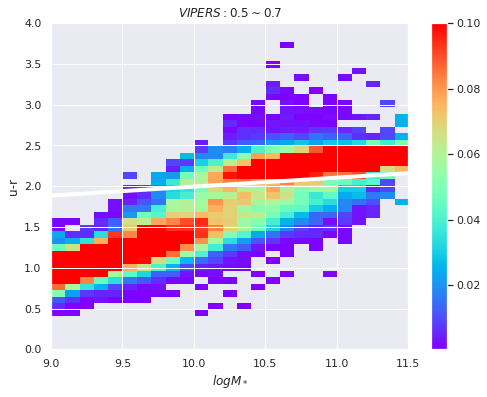

In [29]:
plt.figure(figsize = (8,6))
counts, xbins, ybins = np.histogram2d(mass, u_r,  bins=[30,50],range=[[9,12],[0,4]],weights = weight0)
# print(xbins)
counts = counts.T
counts = counts[::-1]
weight2 = counts / np.sum(counts,axis = 0)
weight2[weight2==0]=np.nan
plt.imshow(weight2,cmap='rainbow',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],aspect='auto',vmax = 0.1)
plt.colorbar()
# plt.plot([9.0,0.52796795083083],[10,0.5819679508308301],color = "red",linewidth = 2,label="cut")
# plt.plot([9.0,12.0],[0.52796795083083,0.6899679508308301],"white",linewidth = 2,label="cut")
plt.plot([9.0,12.0],[1.885,2.215],"-",color="white",linewidth = 4,label="cut")

plt.xlabel("$log M_*$")
plt.ylabel("u-r")
plt.xlim(9,11.5)
plt.ylim(0,4)
# plt.grid()
plt.title('$VIPERS :0.5 \sim 0.7$')
plt.savefig("./VIPERS_density.pdf",dpi =100)

In [31]:
np.save("./VIPERS_5_7.npy",np.array([mass,u_r,weight0]))

In [32]:
weight1 = weight0
massbin = np.array([9.0,9.5,10.0,10.5,11])
All = np.zeros(4)
up = np.zeros(4)
down = np.zeros(4)
frac = np.zeros(4)
for i in range(len(massbin)-1):
    index = ((mass>=massbin[i])&(mass<massbin[i+1])&(u_r>=0.0)&(u_r<=4.0))
    All[i] = np.sum(weight1[index])
    print("The length of All:",len(weight1[index]))
    print(All[i])
    cut = ((u_r[index]-(0.11 * mass[index] - 0.45 * 0.1 + 0.94))>0)
    up[i] = np.sum(weight1[index][cut])
    print("The length of up:",len(weight1[index][cut]))
    print(up[i])
    down[i] = np.sum(weight1[index][~cut])
    print("The length of down:",len(weight1[index][~cut]))
    print(down[i])

The length of All: 5557
9921.10467798539
The length of up: 0
0.0
The length of down: 5557
9921.10467798539
The length of All: 9355
11862.87812087815
The length of up: 214
705.6230102011403
The length of down: 9141
11157.25511067701
The length of All: 10054
10938.429937009505
The length of up: 3335
4072.8342324207993
The length of down: 6719
6865.595704588704
The length of All: 7565
7618.933110094102
The length of up: 4850
4903.876956406906
The length of down: 2715
2715.0561536871955


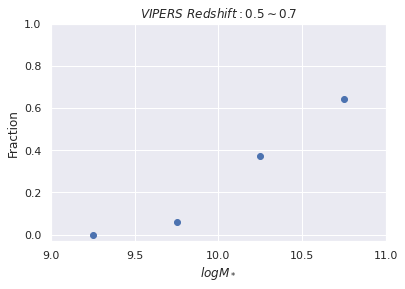

In [33]:
frac = up / All
massbin_0 = 0.5 * (massbin[1:]+massbin[:-1])
plt.scatter(massbin_0,frac)
plt.xlabel("$log M_*$")
plt.ylabel("Fraction")
plt.title("$VIPERS \ Redshift : 0.5 \sim 0.7$")
plt.xticks(np.arange(9, 11.1, step=0.5))
plt.yticks(np.arange(0, 1.01, step=0.2))
plt.savefig("./VIPERS_frac.pdf",dpi=100)